In [1]:
import os
import sys
# module_path = os.path.abspath(os.path.join('../../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
%matplotlib widget

In [2]:
import time
import torch
from torch.utils.data import DataLoader
import argparse
import yaml
from BasisConvolution.detail.radius import radius
from torch.optim import Adam
import torch.autograd.profiler as profiler
from torch.profiler import profile, record_function, ProfilerActivity

# from rbfConv import RbfConv
# from dataset import compressedFluidDataset, prepareData

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
# %matplotlib notebook
import copy

import time
import torch
# from torch_geometric.loader import DataLoader
from tqdm.notebook import trange, tqdm
import argparse
import yaml
# from torch_geometric.nn import radius
from torch.optim import Adam
import torch.autograd.profiler as profiler
from torch.profiler import profile, record_function, ProfilerActivity

# from BasisConvolution.convLayer import RbfConv
# from dataset import compressedFluidDataset, prepareData

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))


import tomli
from scipy.optimize import minimize
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

seed = 0


import random 
import numpy as np
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
# print(torch.cuda.device_count())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('running on: ', device)
torch.set_num_threads(1)

from joblib import Parallel, delayed

# from cutlass import *
# from rbfConv import *
from tqdm.autonotebook import tqdm
import random 
import numpy as np
from BasisConvolution.test_case_II.datautils import splitFile
from BasisConvolution.test_case_II.datautils import datasetLoader, loadFrame
from BasisConvolution.detail.windows import getWindowFunction
from BasisConvolution.test_case_II.util import constructFluidFeatures
from BasisConvolution.convNetv2 import BasisNetwork
from datetime import datetime
import portalocker
from BasisConvolution.detail.augment import augment
from BasisConvolution.test_case_II.training import processBatch
# from datautils import *
# from sphUtils import *
# from lossFunctions import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from BasisConvolution.test_case_II.util import setSeeds, loadDataset, getDataLoader, getFeatureSizes
from BasisConvolution.detail.util import count_parameters
import json
from BasisConvolution.test_case_II.util import NumpyArrayEncoder
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from BasisConvolution.test_case_II.training import loadFrame, runNetwork
from BasisConvolution.detail.scatter import scatter_sum
from BasisConvolution.test_case_II.eval import getUnrollFrame

cm = mpl.colormaps['viridis']

/tmp/ipykernel_207260/952707928.py:74: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# basePath = '~/servus05/dev/datasets/generative2D/train'
basePath = '../../datasets/test_case_II/test'
basePath = os.path.expanduser(basePath)

simulationFiles = [basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')]
debugPrint(simulationFiles)

simulationFiles [list] = ['../../datasets/test_case_II/test/generative - 2023-03-13_10-01-01.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-31-28.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-16-02.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-34-07.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-36-42.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-03-31.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-39-18.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-26-18.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-18-34.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-21-09.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-28-47.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-08-20.hdf5', '../../datasets/test_case_II/test/generative - 2023-03-13_10-05-55.hdf5', '../../datas

In [4]:
trainFolder = os.path.expanduser('../../trainingData/test_case_II/')
subfolders = [ f.path for f in os.scandir(trainFolder) if (f.is_dir() and 'None' not in f.path)]
subfolders = [ f.path for f in os.scandir(trainFolder) if (f.is_dir())]
# subfolders = [ f.path for f in os.scandir('./trainingDataBasisFunctions8x8') if f.is_dir() ]
print(len(subfolders))

subfolders = [s for s in subfolders if os.path.exists(s + '/results.json')]
print(len(subfolders))

dataDict = {}

# subfolders = [subfolders[0]]
for s in tqdm(subfolders):
    with open("%s/results.json" % s, "r") as read_file:
        decodedArray = json.load(read_file)
        dataDict[s] = decodedArray
#         print(decodedArray['hyperParameters'])   

9
7


  0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
from BasisConvolution.test_case_II.eval import *

In [6]:


def loadRbfModel(file, frame, networkPath, epoch):
    with open(os.path.expanduser("%s/results.json" % networkPath), "r") as read_file:
        decodedArray = json.load(read_file)
        dataDict = decodedArray
    
    n = dataDict['hyperParameters']['n']
    m = dataDict['hyperParameters']['m']
    coordinateMapping = dataDict['hyperParameters']['coordinateMapping']
    windowFn = getWindowFunction(dataDict['hyperParameters']['windowFunction'])
    rbf_x = dataDict['hyperParameters']['rbf_x']
    rbf_y = dataDict['hyperParameters']['rbf_y']
    dist = dataDict['hyperParameters']['frameDistance']
    unroll = dataDict['hyperParameters']['maxRollOut']
    arch = [32, 64, 64, 2]
    arch = [16, 32, 32, 2]
    arch = dataDict['hyperParameters']['arch']
    arch = [int(a) for a in arch.split(' ') if a != '']
    epochs = dataDict['hyperParameters']['epochs']
#     print(arch)
#     print(n, m)
#     print(dataDict['hyperParameters']['windowFunction'])
#     print(rbf_x)
#     print(rbf_y)

    attributes, inputData, groundTruthData = loadFrame(file, frame, 1 + np.arange(unroll), dist)
    inputData['fluidGravity'] = inputData['fluidGravity'][:,:2]
    
    
    fluidPositions, boundaryPositions, fluidFeatures, boundaryFeatures = constructFluidFeatures(attributes, inputData)
#     print(fluidFeatures.shape)
#     print(boundaryFeatures.shape)
    
    model = BasisNetwork(fluidFeatures.shape[1],boundaryFeatures.shape[1], layers = arch, coordinateMapping = coordinateMapping, dims=[n, m], windowFn = windowFn, rbfs = [rbf_x, rbf_y], batchSize = 32, )
    dictioniary = torch.load(os.path.expanduser('%s/model_%03d.torch' % (networkPath, epoch if epoch >= 0 else epochs - 1)))
    
    for k, t in dictioniary.items():
        if 'bias' in k and 'conv' in k:
            model = BasisNetwork(fluidFeatures.shape[1],boundaryFeatures.shape[1], layers = arch, coordinateMapping = coordinateMapping, dims=[n, m], windowFn = windowFn, rbfs = [rbf_x, rbf_y], batchSize = 32, )
    model = BasisNetwork(fluidFeatures.shape[1],boundaryFeatures.shape[1], layers = arch, coordinateMapping = coordinateMapping, dims=[n, m], windowFn = windowFn, rbfs = [rbf_x, rbf_y], batchSize = 32, convBias = True)


    # print(dictioniary)
    model.load_state_dict(dictioniary)
    model = model.to(device)
    model.train(False)
    return model, dataDict['hyperParameters']

In [7]:
# fig, axis, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor = preparePlot(networkIndex = 0, simulationIndex = 1)

In [28]:
def preparePlot(networkIndex, simulationIndex = 0, initialFrame = 1024, unrollSteps = 64, epoch = -1):
#     networkIndex = 0
#     simulationIndex = 0
#     initialFrame = 1024
#     unrollSteps = 32
#     epoch = -1
    # generative2D - n=[ 2, 2] rbf=[linear,linear] map = preserving window = poly6 d = 32 e = 10 arch 32 64 64 3 distance = 32 - 2023-03-14_19-24-27
    model, hyperParams = loadRbfModel(simulationFiles[simulationIndex], 0, subfolders[networkIndex], epoch)
    # model, hyperParams = loadRbfModel(simulationFiles[0], 0, '/home/winchenbach/trainingdata_2D_deltaSPH_001/generative2D - n=[ 4, 4] rbf=[linear,linear] map = preserving window = poly6 d = 32 e = 10 arch 32 64 64 3 distance = 32 - 2023-03-14_20-28-56', -1)

    attributes, inputData, groundTruths = loadFrame(simulationFiles[simulationIndex], initialFrame, 1 + np.arange(unrollSteps), hyperParams['frameDistance'])
    # attributes['support'] = 0.01 /4 * 4.5 
    fluidPositions, boundaryPositions, fluidFeatures, boundaryFeatures = constructFluidFeatures(attributes, inputData)

    fluidFeatures = fluidFeatures.to(device)

    model, hyperParams = loadRbfModel(simulationFiles[0], 0, subfolders[1], -1)

    predictedPositions = fluidPositions.to(device)
    predictedVelocity = inputData['fluidVelocity'].to(device)

    gravity = inputData['fluidGravity'][:,:2].to(device) #torch.zeros_like(predictedVelocity)

    # with torch.no_grad():
    #     for unrollStep in tqdm(range(unrollSteps)):
    #         loss, predictedPositions, predictedVelocity = runNetwork(predictedPositions, predictedVelocity, attributes, hyperParams['frameDistance'], gravity, fluidFeatures, boundaryPositions.to(device), boundaryFeatures.to(device), groundTruths[0], model, None, None, True)

    positions = predictedPositions
    velocities = predictedVelocity
    unrollStep = 0


    gtPositions = groundTruths[unrollStep][:,:2].to(device)
    gtVelocities = groundTruths[unrollStep][:,2:4].to(device)
    gtDensity = groundTruths[unrollStep][:,4].to(device)

    fluidArea = inputData['fluidArea'].to(device)

    boundaryPositions = inputData['boundaryPosition'].to(device)
    boundaryArea = inputData['boundaryArea'].to(device)
    # positionLoss, velocityLoss, density, gtDensity, colorField, gtColorField, colorGrad, gtColorGrad = analyzeParticles(positions, gtPositions, boundaryPositions, velocities, gtVelocities, fluidArea, boundaryArea, attributes)
    positionLoss, velocityLoss, density, gtDensity, colorField, gtColorField, colorGrad, gtColorGrad = particleAnalysis(positions, gtPositions, boundaryPositions, velocities, gtVelocities, fluidArea, boundaryArea, attributes, plot = False, device =device)

    fp, meshDensity, meshVelocity, meshDivergence = getMeshQuantities(positions, boundaryPositions, fluidArea, boundaryArea, density, velocities, attributes, n = 512)
    fp, gtMeshDensity, gtMeshVelocity, gtMeshDivergence = getMeshQuantities(gtPositions, boundaryPositions, fluidArea, boundaryArea, gtDensity, gtVelocities, attributes, n = 512)


    data = torch.linalg.norm(meshVelocity,dim=2)
    gtData = torch.linalg.norm(gtMeshVelocity,dim=2)
    ffp, fft, gtFft, psd, gtPsd = meshAnalysis(fp, data, gtData,linThresh=1e0, linScale = 0.5, plot = False)
    fig, axis = plt.subplots(2, 4, figsize=(16,8*1.09), sharex = False, sharey = False, squeeze = False)

    kvals,Abins = psd
    kvals,gtAbins = gtPsd
    fig.suptitle('%s [epoch %2d]\n %s [frame %4d] @ %2d/%4d unroll' % (subfolders[networkIndex].split('/')[-1], epoch, simulationFiles[simulationIndex].split('/')[-1], initialFrame, 0 + 1, (0+1) * hyperParams['frameDistance'] ))

    scDensity, cbarDensity = scatterPlot(fig, axis[0,0], positions, density, boundaryPositions, 'Predicted Density')
    scVelocity, cbarvelocity = scatterPlot(fig, axis[0,1], positions, torch.linalg.norm(velocities,dim=-1), boundaryPositions, 'Predicted Velocity')
    scColor, cbarColor = scatterPlot(fig, axis[0,2], positions, torch.linalg.norm(colorGrad,dim=-1), boundaryPositions, 'Predicted |Grad Color|')

    imPredDensity, cbarPredDensity = meshPlot(fig, axis[1,0], fp, meshDensity, 'Predicted Density')
    # imGTDensity, cbarGTDensity = meshPlot(axis[1,0], fp, gtMeshDensity, 'Groundtruth Density')
    imPredVelocity, cbarPredVelocity = meshPlot(fig, axis[1,1], fp, torch.linalg.norm(meshVelocity, dim = -1), 'Predicted Velocity')
    # imGTVelocity, cbarGTVelocity = meshPlot(axis[1,1], fp, torch.linalg.norm(gtMeshVelocity, dim = -1), 'Groundtruth Velocity')
    imPredDivergence, cbarPredDivergence = meshPlot(fig, axis[1,2], fp, meshDivergence, 'Predicted Divergence')
    # imGTDivergence, cbarGTDivergence = meshPlot(axis[1,2], fp, gtMeshDivergence, 'Groundtruth Divergence')
    ax = axis[0,3]
    ax.set_title('FFT Prediction')
    imPredFFT = ax.pcolormesh(ffp[:,0].reshape(data.shape).detach().cpu().numpy(), ffp[:,1].reshape(data.shape).detach().cpu().numpy(), torch.real(fft).detach().cpu().numpy(),
                      norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-torch.max(torch.abs(torch.real(fft))), vmax=torch.max(torch.abs(torch.real(fft))), base=10), cmap = 'twilight')    
    ax1_divider = make_axes_locatable(ax)
    cax1 = ax1_divider.append_axes("bottom", size="5%", pad="15%")
    cbarPredFFT = fig.colorbar(imPredFFT, cax=cax1,orientation='horizontal')
    cbarPredFFT.ax.tick_params(labelsize=8) 
    axis[1,3].set_title('PSD')
    axis[1,3].loglog(kvals, Abins, label = 'Prediction')
    axis[1,3].loglog(kvals, gtAbins, label = 'Groundtruth')
    axis[1,3].set_xlabel("$k$")
    axis[1,3].set_ylabel("$P(k)$")
    axis[1,3].legend()
    fig.tight_layout()

    # updatePlot2(fig, axis, positions, density, velocities, colorGrad, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor)
    return fig, axis, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor

def unrollPlot(fig, axis, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor, networkIndex, simulationIndex = 0, initialFrame = 1024, unrollSteps = 64, epoch = -1):
    unrollStep = 0
    model, hyperParams = loadRbfModel(simulationFiles[simulationIndex], 0, subfolders[networkIndex], epoch)
    fig.suptitle('%s [epoch %2d]\n %s [frame %4d] @ %2d/%4d unroll' % (subfolders[networkIndex].split('/')[-1], epoch, simulationFiles[simulationIndex].split('/')[-1], initialFrame, unrollStep + 1, (unrollStep+1) * hyperParams['frameDistance'] ))
    attributes, inputData, groundTruths = loadFrame(simulationFiles[simulationIndex], initialFrame, 1 + np.arange(unrollSteps), hyperParams['frameDistance'])
    fluidPositions, boundaryPositions, fluidFeatures, boundaryFeatures = constructFluidFeatures(attributes, inputData)
    fluidFeatures = fluidFeatures.to(device)
    model, hyperParams = loadRbfModel(simulationFiles[0], 0, subfolders[networkIndex], -1)
    predictedPositions = fluidPositions.to(device)
    predictedVelocity = inputData['fluidVelocity'].to(device)
    gravity = inputData['fluidGravity'][:,:2].to(device) 
    label = 'baseFunctionTestWithParticles'
    sim = simulationFiles[simulationIndex].split('/')[-1].split('.')[0]#.replace(' ', '_')
    net = subfolders[networkIndex].split('/')[-1]#.replace(' ', '_')
    # imageFolder = '../images/%s/%s/%s/' % (label, sim, net)
    # if not os.path.exists(imageFolder):
    #     if not os.path.exists(imageFolder):
    #         os.makedirs(imageFolder)
    with torch.no_grad():
        for unrollStep in tqdm(range(unrollSteps), leave = False):
            loss, predictedPositions, predictedVelocity = runNetwork(predictedPositions, predictedVelocity, attributes, hyperParams['frameDistance'], gravity, fluidFeatures, boundaryPositions.to(device), boundaryFeatures.to(device), groundTruths[0], model, None, None, True)    
            positions = predictedPositions
            velocities = predictedVelocity
            gtPositions = groundTruths[unrollStep][:,:2].to(device)
            gtVelocities = groundTruths[unrollStep][:,2:4].to(device)
            gtDensity = groundTruths[unrollStep][:,4].to(device)
            fluidArea = inputData['fluidArea'].to(device)
            boundaryPositions = inputData['boundaryPosition'].to(device)
            boundaryArea = inputData['boundaryArea'].to(device)
            positionLoss, velocityLoss, density, gtDensity, colorField, gtColorField, colorGrad, gtColorGrad = particleAnalysis(positions, gtPositions, boundaryPositions, velocities, gtVelocities, fluidArea, boundaryArea, attributes, plot = False, device = device)
            fp, meshDensity, meshVelocity, meshDivergence = getMeshQuantities(positions, boundaryPositions, fluidArea, boundaryArea, density, velocities, attributes, n = 512)
            fp, gtMeshDensity, gtMeshVelocity, gtMeshDivergence = getMeshQuantities(gtPositions, boundaryPositions, fluidArea, boundaryArea, gtDensity, gtVelocities, attributes, n = 512)
            data = torch.linalg.norm(meshVelocity,dim=2)
            gtData = torch.linalg.norm(gtMeshVelocity,dim=2)
            ffp, fft, gtFft, psd, gtPsd = meshAnalysis(fp, data, gtData,linThresh=1e0, linScale = 0.5, plot = False)
            kvals,Abins = psd
            kvals,gtAbins = gtPsd
            fig.suptitle('%s [epoch %2d]\n %s [frame %4d] @ %2d/%4d unroll' % (subfolders[networkIndex].split('/')[-1], epoch, simulationFiles[simulationIndex].split('/')[-1], initialFrame, unrollStep + 1, (unrollStep+1) * hyperParams['frameDistance'] ))
            updatePlot2(fig, axis, positions, density, velocities, colorGrad, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor)
    #                 updatePlot(fig, axis, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins)
    #             imagePath = '../images/%s/%s/%s/%04d.png' % (label, sim, net, unrollStep)
    #             plt.savefig(imagePath, dpi = 200)
    #         p = subprocess.Popen(shlex.split("/usr/bin/ffmpeg -y -hide_banner -loglevel error -framerate 25 -f image2 -pattern_type glob -i '*.png' -c:v libx264 -b:v 20M -r 25 out.mp4"), cwd='../images/%s/%s/%s/' % (label, sim, net))
    #         p.wait()
    #         p = subprocess.Popen(shlex.split("/usr/bin/ffmpeg -y -hide_banner -loglevel error -i out.mp4 -filter_complex 'fps=50,scale=720:-1:flags=lanczos,split[s0][s1];[s0]palettegen=max_colors=32[p];[s1][p]paletteuse=dither=bayer' output.gif"), cwd='../images/%s/%s/%s/' % (label, sim, net))
    #         p.wait()
    #         p = subprocess.Popen(shlex.split('cp out.mp4 ../%s.mp4' % (net.replace(' ','_'))), cwd = '../images/%s/%s/%s/' % (label, sim, net))
    #         p = subprocess.Popen(shlex.split('cp output.gif ../%s.gif' % (net.replace(' ','_'))), cwd = '../images/%s/%s/%s/' % (label, sim, net))
    #         p.wait()
    

def updatePlot2(fig, axis, positions, density, velocities, colorGrad, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor):
    
    scDensity.set_offsets(positions.detach().cpu().numpy())
    scDensity.set_array(density.detach().cpu().numpy())
    cbarDensity.mappable.set_clim(vmin = torch.min(density), vmax = torch.max(density))
    
    imPredDensity.set_array(meshDensity.detach().cpu().numpy())
    cbarPredDensity.mappable.set_clim(vmin=torch.min(meshDensity), vmax = torch.max(meshDensity))
    
    sVel = torch.linalg.norm(velocities, dim = -1)
    scVelocity.set_offsets(positions.detach().cpu().numpy())
    scVelocity.set_array(sVel.detach().cpu().numpy())
    cbarvelocity.mappable.set_clim(vmin = torch.min(sVel), vmax = torch.max(sVel))
    
#     imPredDensity.set_array(gtMeshDensity.detach().cpu().numpy())
#     cbarPredDensity.mappable.set_clim(vmin=min(torch.min(gtMeshDensity), torch.min(meshDensity)), vmax=max(torch.max(gtMeshDensity), torch.max(meshDensity)))

    pVel = torch.linalg.norm(meshVelocity, dim = -1)
    gVel = torch.linalg.norm(gtMeshVelocity, dim = -1)

    imPredVelocity.set_array(pVel.detach().cpu().numpy())
#     cbarPredVelocity.mappable.set_clim(vmin=min(torch.min(gVel), torch.min(pVel)), vmax=max(torch.max(gVel), torch.max(pVel)))
    cbarPredVelocity.mappable.set_clim(vmin=torch.min(pVel), vmax = torch.max(pVel))
#     imGTVelocity.set_array(gVel.detach().cpu().numpy())
#     cbarGTVelocity.mappable.set_clim(vmin=min(torch.min(gVel), torch.min(pVel)), vmax=max(torch.max(gVel), torch.max(pVel)))
    cGrad = torch.linalg.norm(colorGrad, dim = -1)
    scColor.set_offsets(positions.detach().cpu().numpy())
    scColor.set_array(cGrad.detach().cpu().numpy())
    cbarColor.mappable.set_clim(vmin = torch.min(cGrad), vmax = torch.max(cGrad))
    

    imPredDivergence.set_array(meshDivergence.detach().cpu().numpy())
#     cbarPredDivergence.mappable.set_clim(vmin=min(torch.min(gtMeshDivergence), torch.min(meshDivergence)), vmax=max(torch.max(gtMeshDivergence), torch.max(meshDivergence)))
    cbarPredDivergence.mappable.set_clim(vmin=torch.min(meshDivergence), vmax = torch.max(meshDivergence))
#     imGTDivergence.set_array(gtMeshDivergence.detach().cpu().numpy())
#     cbarGTDivergence.mappable.set_clim(vmin=min(torch.min(gtMeshDivergence), torch.min(meshDivergence)), vmax=max(torch.max(gtMeshDivergence), torch.max(meshDivergence)))

    imPredFFT.set_array(torch.real(fft).detach().cpu().numpy())
    cbarPredFFT.mappable.set_clim(vmin=-torch.max(torch.abs(torch.real(fft))), vmax=torch.max(torch.abs(torch.real(fft))))

    axis[1,3].cla()
    axis[1,3].set_title('PSD')
    axis[1,3].loglog(kvals, Abins, label = 'Prediction')
    axis[1,3].loglog(kvals, gtAbins, label = 'Groundtruth')
    axis[1,3].set_xlabel("$k$")
    axis[1,3].set_ylabel("$P(k)$")
    axis[1,3].legend()

    fig.canvas.draw()
    fig.canvas.flush_events()

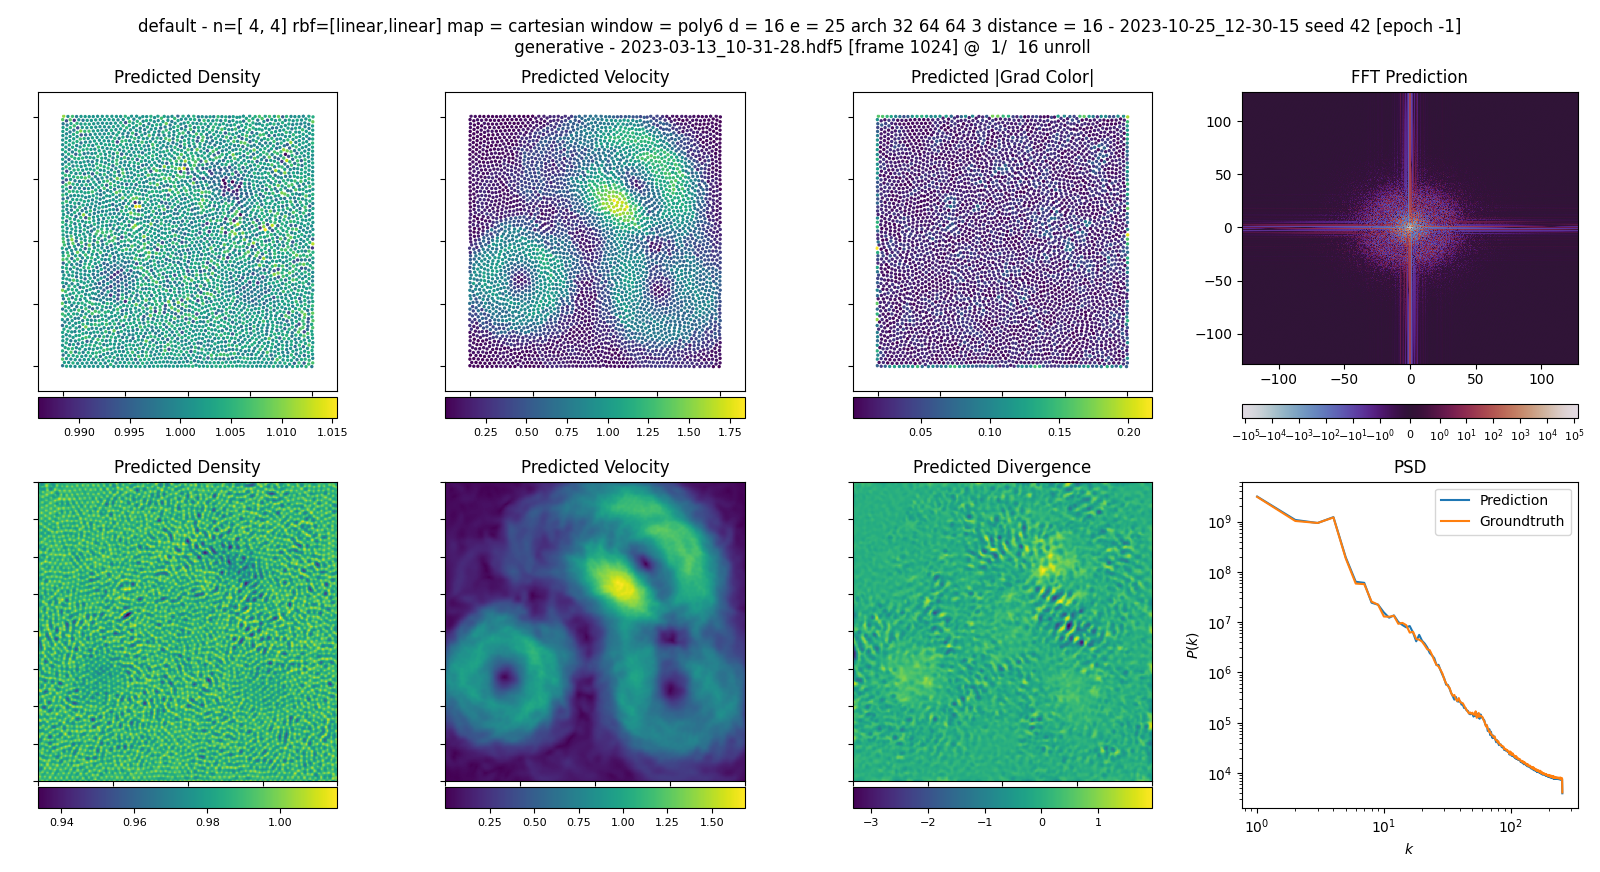

In [29]:
fig, axis, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor = preparePlot(networkIndex = 0, simulationIndex = 1)

In [30]:
unrollPlot(fig, axis, scDensity, cbarDensity, imPredDensity, cbarPredDensity, scVelocity, cbarvelocity, imPredVelocity, cbarPredVelocity, imPredDivergence, cbarPredDivergence,imPredFFT, cbarPredFFT, scColor, cbarColor, networkIndex = 0, simulationIndex = 1)

  0%|          | 0/64 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# for networkIndex in tqdm(range(len(subfolders))):
#     unrollStep = 0
#     fig.suptitle('%s [epoch %2d]\n %s [frame %4d] @ %2d/%4d unroll' % (subfolders[networkIndex].split('/')[-1], epoch, simulationFiles[simulationIndex].split('/')[-1], initialFrame, unrollStep + 1, (unrollStep+1) * hyperParams['frameDistance'] ))
#     model, hyperParams = loadRbfModel(simulationFiles[simulationIndex], 0, subfolders[networkIndex], epoch)
#     attributes, inputData, groundTruths = loadFrame(simulationFiles[simulationIndex], initialFrame, 1 + np.arange(unrollSteps), hyperParams['frameDistance'])
#     fluidPositions, boundaryPositions, fluidFeatures, boundaryFeatures = constructFluidFeatures(attributes, inputData)
#     fluidFeatures = fluidFeatures.to(device)
#     model, hyperParams = loadRbfModel(simulationFiles[0], 0, subfolders[networkIndex], -1)
#     predictedPositions = fluidPositions.to(device)
#     predictedVelocity = inputData['fluidVelocity'].to(device)
#     gravity = inputData['fluidGravity'][:,:2].to(device) 
#     label = 'baseFunctionTestWithParticles'
#     sim = simulationFiles[simulationIndex].split('/')[-1].split('.')[0]#.replace(' ', '_')
#     net = subfolders[networkIndex].split('/')[-1]#.replace(' ', '_')
#     imageFolder = '../images/%s/%s/%s/' % (label, sim, net)
#     if not os.path.exists(imageFolder):
#         if not os.path.exists(imageFolder):
#             os.makedirs(imageFolder)
#         with torch.no_grad():
#             for unrollStep in tqdm(range(unrollSteps), leave = False):
#                 loss, predictedPositions, predictedVelocity = runNetwork(predictedPositions, predictedVelocity, attributes, hyperParams['frameDistance'], gravity, fluidFeatures, boundaryPositions.to(device), boundaryFeatures.to(device), groundTruths[i], model, None, None, True)    
#                 positions = predictedPositions
#                 velocities = predictedVelocity
#                 gtPositions = groundTruths[unrollStep][:,:2].to(device)
#                 gtVelocities = groundTruths[unrollStep][:,2:4].to(device)
#                 gtDensity = groundTruths[unrollStep][:,4].to(device)
#                 fluidArea = inputData['fluidArea'].to(device)
#                 boundaryPositions = inputData['boundaryPosition'].to(device)
#                 boundaryArea = inputData['boundaryArea'].to(device)
#                 positionLoss, velocityLoss, density, gtDensity, colorField, gtColorField, colorGrad, gtColorGrad = particleAnalysis(positions, gtPositions, boundaryPositions, velocities, gtVelocities, fluidArea, boundaryArea, attributes, plot = False)
#                 fp, meshDensity, meshVelocity, meshDivergence = getMeshQuantities(positions, boundaryPositions, fluidArea, boundaryArea, density, velocities, attributes, n = 512)
#                 fp, gtMeshDensity, gtMeshVelocity, gtMeshDivergence = getMeshQuantities(gtPositions, boundaryPositions, fluidArea, boundaryArea, gtDensity, gtVelocities, attributes, n = 512)
#                 data = torch.linalg.norm(meshVelocity,dim=2)
#                 gtData = torch.linalg.norm(gtMeshVelocity,dim=2)
#                 ffp, fft, gtFft, psd, gtPsd = meshAnalysis(fp, data, gtData,linThresh=1e0, linScale = 0.5, plot = False)
#                 kvals,Abins = psd
#                 kvals,gtAbins = gtPsd
#                 fig.suptitle('%s [epoch %2d]\n %s [frame %4d] @ %2d/%4d unroll' % (subfolders[networkIndex].split('/')[-1], epoch, simulationFiles[simulationIndex].split('/')[-1], initialFrame, unrollStep + 1, (unrollStep+1) * hyperParams['frameDistance'] ))
#                 updatePlot2(fig, axis, positions, density, velocities, colorGrad, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins)
# #                 updatePlot(fig, axis, meshDensity, gtMeshDensity, meshVelocity, gtMeshVelocity, meshDivergence, gtMeshDivergence, fft, kvals, Abins, gtAbins)
#                 imagePath = '../images/%s/%s/%s/%04d.png' % (label, sim, net, unrollStep)
#                 plt.savefig(imagePath, dpi = 200)
#             p = subprocess.Popen(shlex.split("/usr/bin/ffmpeg -y -hide_banner -loglevel error -framerate 25 -f image2 -pattern_type glob -i '*.png' -c:v libx264 -b:v 20M -r 25 out.mp4"), cwd='../images/%s/%s/%s/' % (label, sim, net))
#             p.wait()
#             p = subprocess.Popen(shlex.split("/usr/bin/ffmpeg -y -hide_banner -loglevel error -i out.mp4 -filter_complex 'fps=50,scale=720:-1:flags=lanczos,split[s0][s1];[s0]palettegen=max_colors=32[p];[s1][p]paletteuse=dither=bayer' output.gif"), cwd='../images/%s/%s/%s/' % (label, sim, net))
#             p.wait()
#             p = subprocess.Popen(shlex.split('cp out.mp4 ../%s.mp4' % (net.replace(' ','_'))), cwd = '../images/%s/%s/%s/' % (label, sim, net))
#             p = subprocess.Popen(shlex.split('cp output.gif ../%s.gif' % (net.replace(' ','_'))), cwd = '../images/%s/%s/%s/' % (label, sim, net))
#             p.wait()
#     else:
#         print('nothing to do for %s/%s' % (sim, net))